In [11]:
# bibliotecas

#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

from utiles import spike_reducer
#spike_recuder
import umap
import umap.plot
from umap import UMAP

##Generar un archivo PKL
import pickle 

##Algoritmosde Clustering

import hdbscan
from sknetwork.clustering import Louvain


In [95]:
# C A R G A
import pickle
#name = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/C5.pckl"
#charge_pckl = open(name,'rb') 
#experiment_pckl = pickle.load(charge_pckl)
#charge_pckl.close()

name1 = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/L6_v2.pckl"
name2 = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/C5.pckl"
charge_pckl1 = open(name1,'rb') 
charge_pckl2 = open(name2,'rb') 
experiment_pckl1 = pickle.load(charge_pckl1)
experiment_pckl2 = pickle.load(charge_pckl2)

experiment_pckl = np.concatenate((experiment_pckl1, experiment_pckl2), axis = 0)

charge_pckl1.close()
charge_pckl2.close()

In [39]:
#Exploración de datos
len(experiment_pckl)

4924

In [40]:
# . . : : U M A P : : . .

reduced_spikes = spike_reducer(experiment_pckl, v_neighbors = 35, random_state = 18)
spike_embedding = reduced_spikes.embedding_
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
clusterer.fit(spike_embedding)

HDBSCAN(min_cluster_size=15)

4691
Cluster encontrados: [0, 1, 2, 3]
Spikes detected: 4924


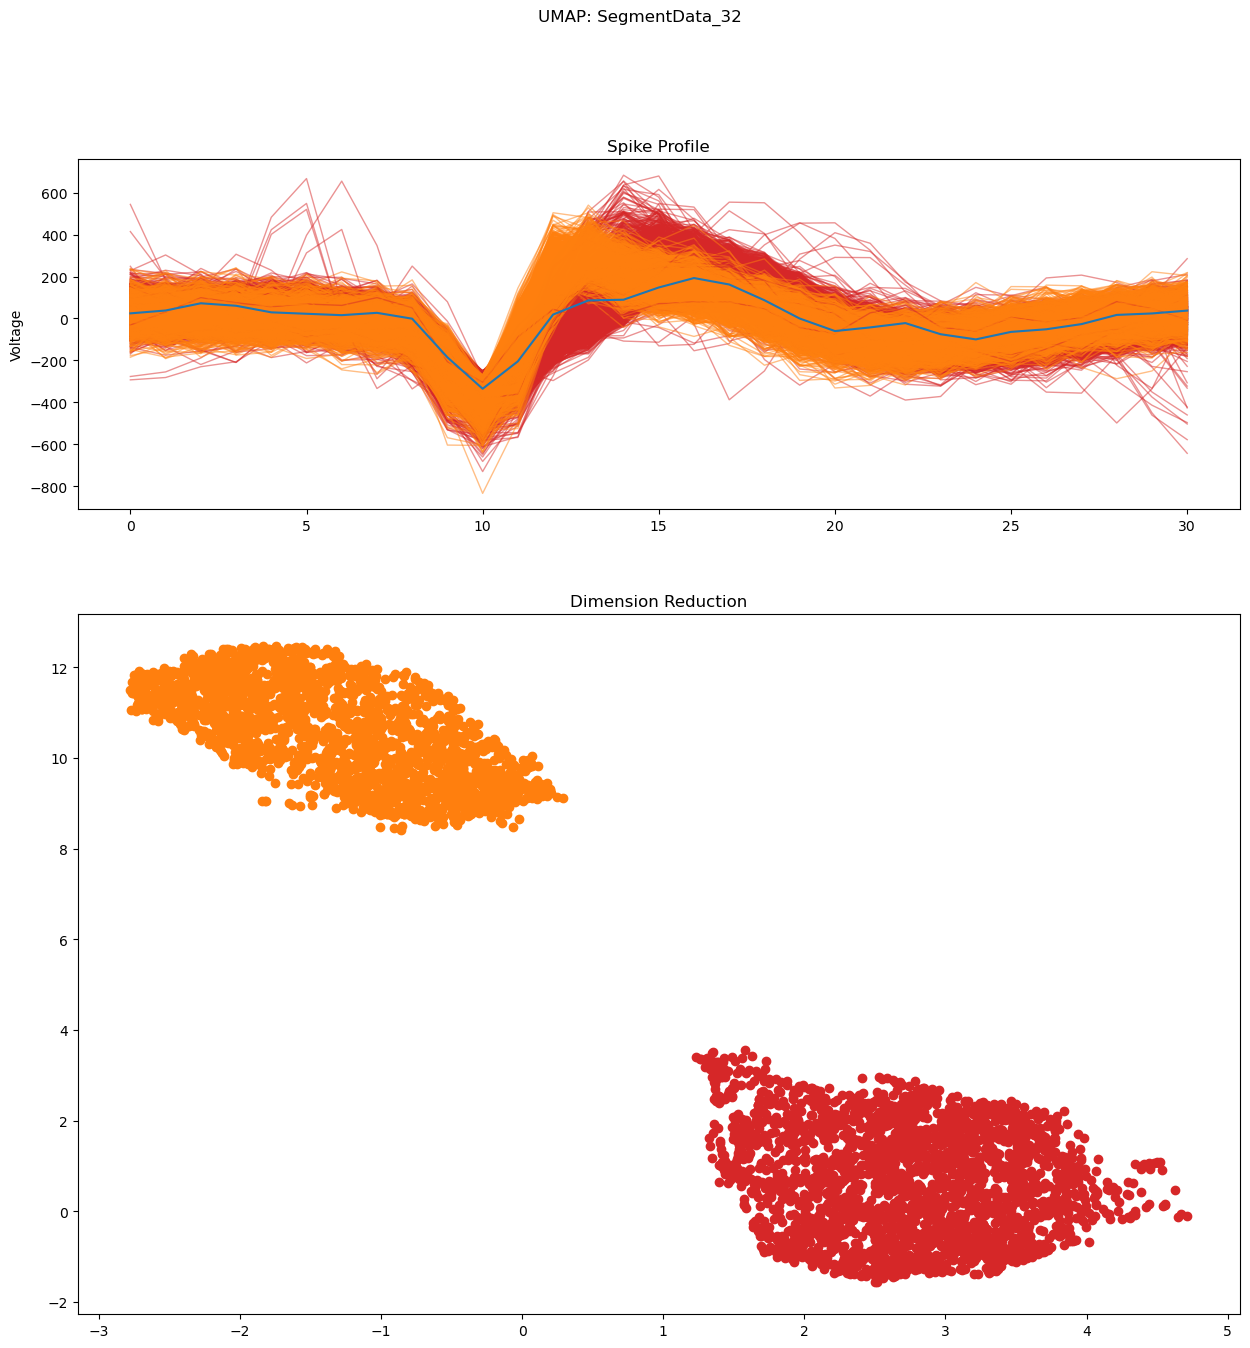

In [74]:
# mini GUI 
# gamma 0.85 0.9 para 
'''Analisis para un solo '''
segment = 'SegmentData_32'
mode = 'OneColor'
#mode = 'All'
cluster_list = [1, 3]
#cluster_list = [0]

#name = './files/CTR20211101s01B_SPK.pckl'
#name = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/L6_v2.pckl"

colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, axs = plt.subplots(2, figsize=(15,15), gridspec_kw={'height_ratios': [1, 2]})
fig.suptitle("UMAP: {}".format(segment))

axs[0].title.set_text('Spike Profile')
axs[0].set(ylabel='Voltage')

axs[1].title.set_text('Dimension Reduction')

conde_extra = 0
list_tmp = []
list_ts = []
template = {}
clusters_seg = {}
#for i in range(0, len(cluster_list))

for j in range(0, len(experiment_pckl)):
    
    
    
    if mode == "All":
        axs[0].plot(experiment_pckl[j].T, color = colores[clusterer.labels_[j]], linewidth=1, alpha =0.25)
        axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = colores[clusterer.labels_[j]])
        
    elif mode == "OneColor":
        if clusterer.labels_[j] in cluster_list:
            axs[0].plot(experiment_pckl[j].T, color = colores[clusterer.labels_[j]], linewidth=1, alpha =0.5)
            list_tmp.append(experiment_pckl[j])
            #list_ts.append(experiment_pckl[segment][1][j])
            axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = colores[clusterer.labels_[j]])
            
            #template
            
            if not(clusterer.labels_[j] in template.keys()):
                template [clusterer.labels_[j]] = experiment_pckl[j]
            else:
                for k in range(0, len(experiment_pckl[j])):
                    template[clusterer.labels_[j]][k] = (experiment_pckl[j][k] + template[clusterer.labels_[j]][k])/2
            
            #plt.plot(template[1].T)
            if not(clusterer.labels_[j] in clusters_seg.keys()):
                clusters_seg [clusterer.labels_[j]] = []
                clusters_seg [clusterer.labels_[j]].append(experiment_pckl[j])
            else:
                clusters_seg[clusterer.labels_[j]].append(experiment_pckl[j])
                
                
                
            conde_extra += 1
        else:
            #axs[0].plot(experiment_pckl[segment][0][j].T, color = "gray", linewidth=1, alpha =0.1)
            #axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = "gray")
            pass
    
    #Solo graficas un cluster
print(conde_extra)
cluster_dict = {} 
num_clusters = list(set(clusterer.labels_))

print("Cluster encontrados: {}".format(num_clusters))
print("Spikes detected: {}".format(len(experiment_pckl)))
for i in range(0, len(num_clusters)):
    cluster_dict[num_clusters[i]] = []
for i in range(0, len(experiment_pckl)):
    cluster_dict[clusterer.labels_[i]].append(i)
    
#axs[0].plot(template[1].T, linewidth=1.5, alpha =1)
axs[0].plot(template[3].T, linewidth=1.5, alpha =1)

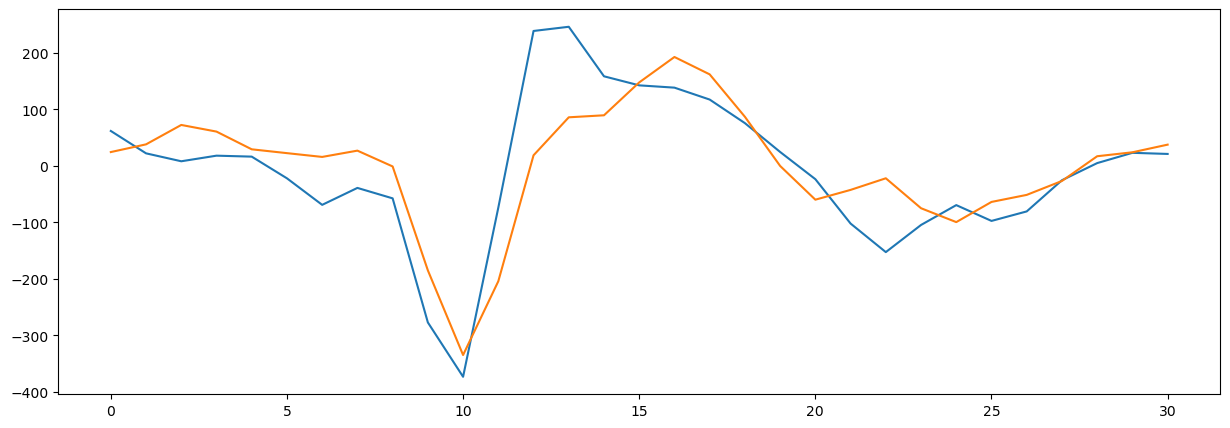

In [72]:
plt.figure(figsize=(15,5))
plt.plot(template[1].T)
plt.plot(template[3].T)

In [75]:
clusters_seg.keys()

dict_keys([3, 1])

In [77]:
len(clusters_seg[3][0])

31

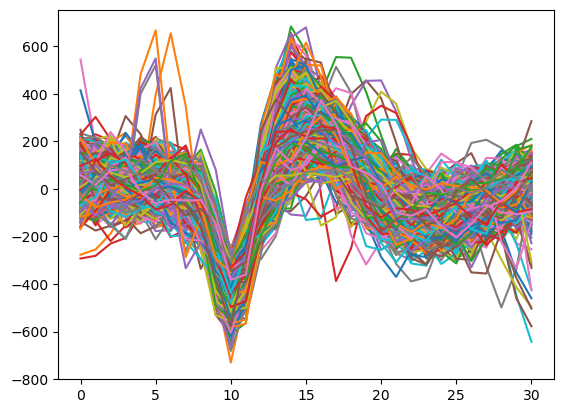

In [80]:
plt.plot(np.array(clusters_seg[3]).T)
plt.show()

In [85]:
template1 = np.mean(np.array(clusters_seg[3]), axis =0)
template1.shape

(31,)

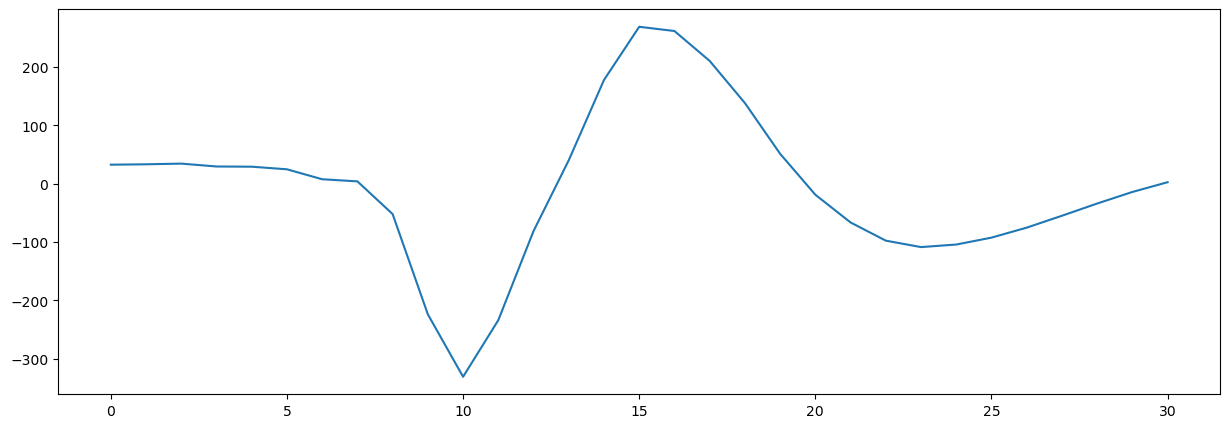

In [87]:
plt.figure(figsize = (15,5))
plt.plot(template1)

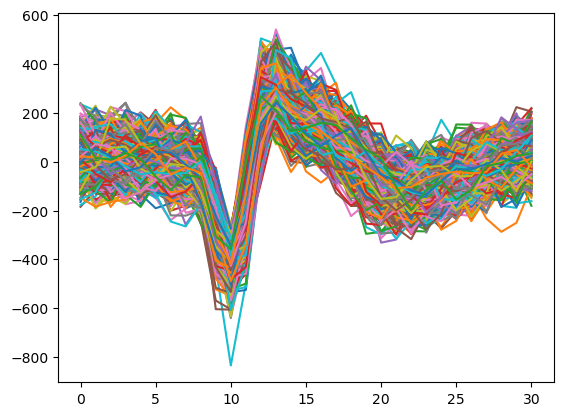

In [82]:
plt.plot(np.array(clusters_seg[1]).T)
plt.show()

In [88]:
template2 = np.mean(np.array(clusters_seg[1]), axis =0)
template2.shape

(31,)

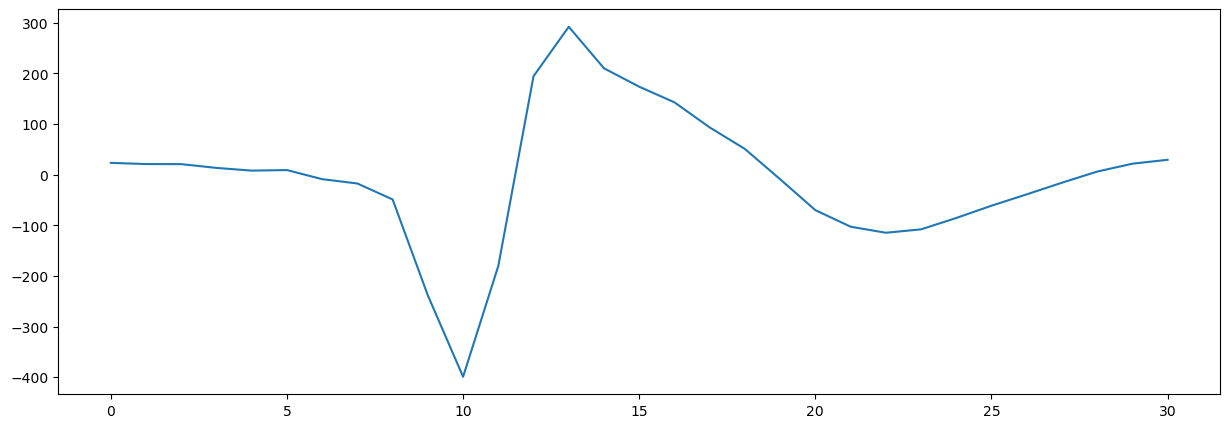

In [90]:
plt.figure(figsize = (15,5))
plt.plot(template2)

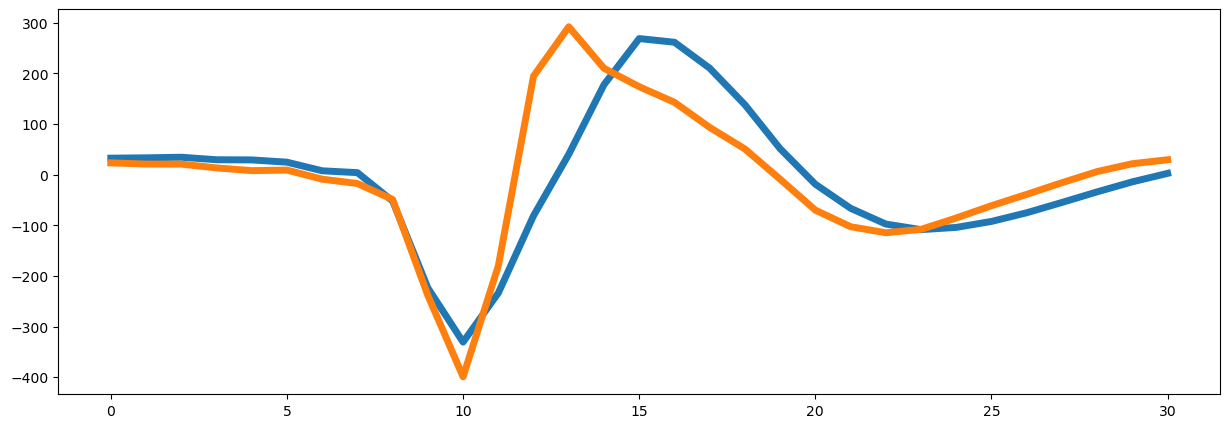

In [93]:
plt.figure(figsize = (15,5))
plt.plot(template1, lw = 5)
plt.plot(template2, lw =5)

In [94]:
np.corrcoef(template1, template2)

array([[1.        , 0.80136633],
       [0.80136633, 1.        ]])

In [100]:
# C A R G A
import pickle
#name = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/C5.pckl"
#charge_pckl = open(name,'rb') 
#experiment_pckl = pickle.load(charge_pckl)
#charge_pckl.close()

name = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/L6_RossiTH.pckl"
charge_pckl = open(name,'rb') 
experiment_pckl = pickle.load(charge_pckl)

charge_pckl.close()

In [101]:
# . . : : U M A P : : . .

reduced_spikes = spike_reducer(experiment_pckl, v_neighbors = 35, random_state = 18)
spike_embedding = reduced_spikes.embedding_
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
clusterer.fit(spike_embedding)

HDBSCAN(min_cluster_size=15)

350
Cluster encontrados: [0, 1, 2, 3]
Spikes detected: 4003


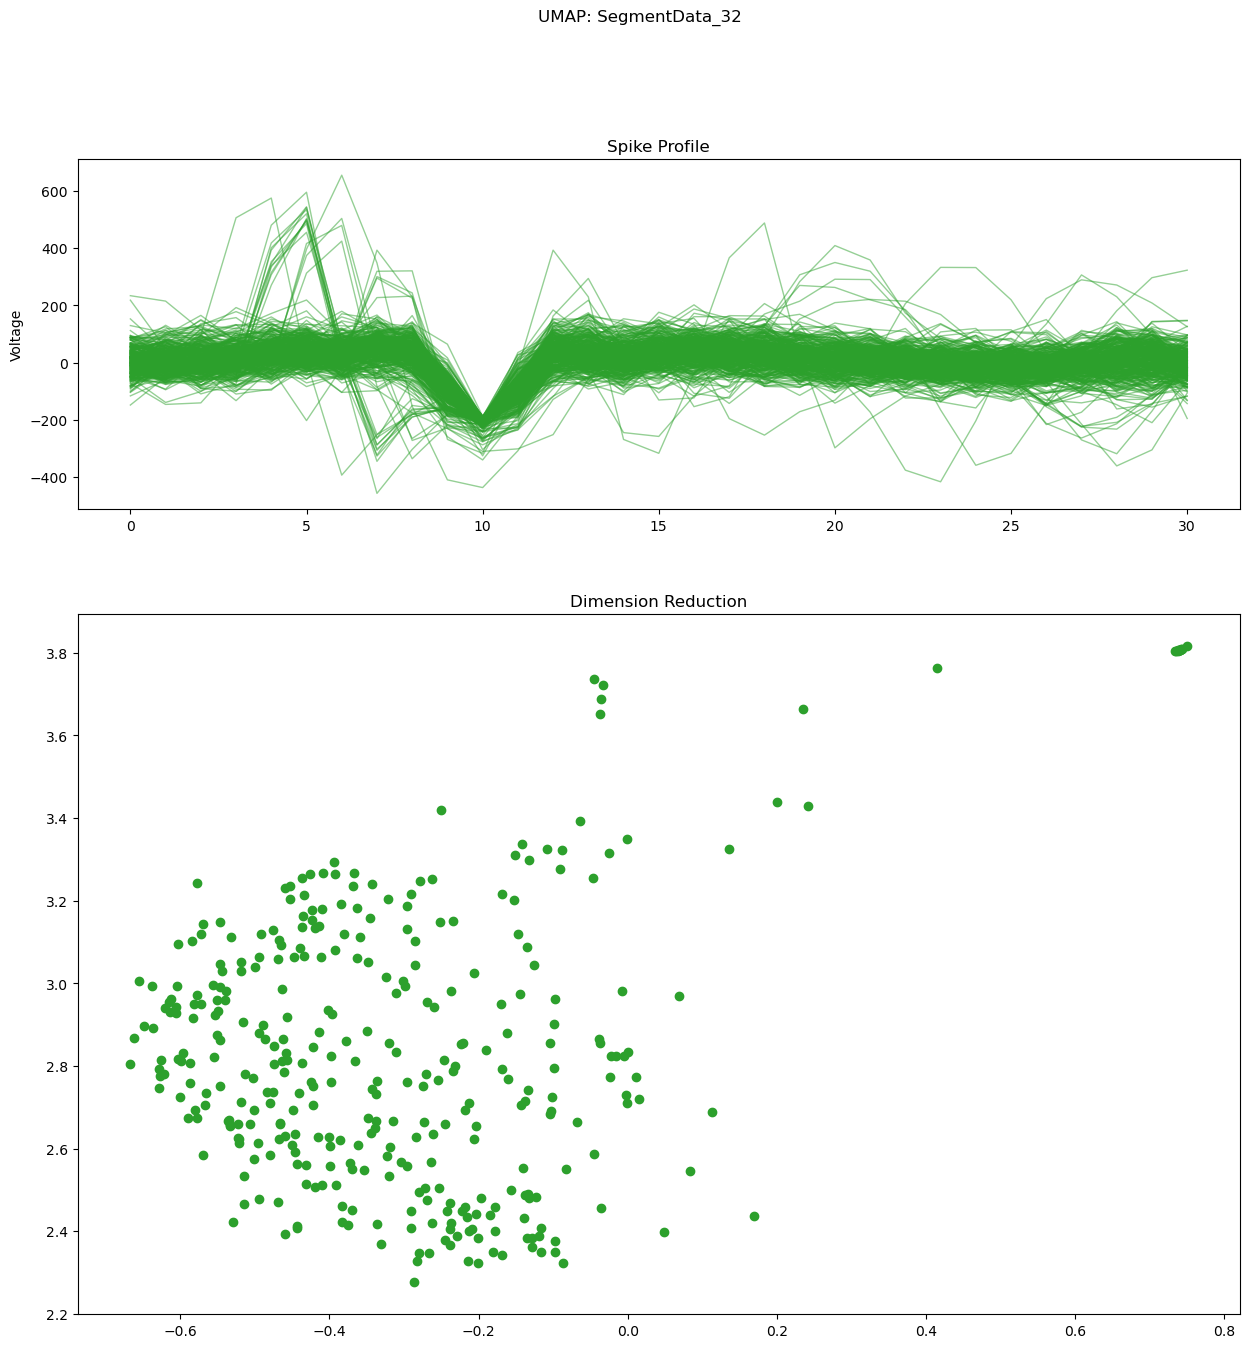

In [109]:
# mini GUI 
# gamma 0.85 0.9 para 
'''Analisis para un solo '''
segment = 'SegmentData_32'
mode = 'OneColor'
#mode = 'All'
cluster_list = [2]
#cluster_list = [0]

#name = './files/CTR20211101s01B_SPK.pckl'
#name = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/L6_v2.pckl"

colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, axs = plt.subplots(2, figsize=(15,15), gridspec_kw={'height_ratios': [1, 2]})
fig.suptitle("UMAP: {}".format(segment))

axs[0].title.set_text('Spike Profile')
axs[0].set(ylabel='Voltage')

axs[1].title.set_text('Dimension Reduction')

conde_extra = 0
list_tmp = []
list_ts = []
template = {}
clusters_seg = {}
#for i in range(0, len(cluster_list))

for j in range(0, len(experiment_pckl)):
    
    
    
    if mode == "All":
        axs[0].plot(experiment_pckl[j].T, color = colores[clusterer.labels_[j]], linewidth=1, alpha =0.25)
        axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = colores[clusterer.labels_[j]])
        
    elif mode == "OneColor":
        if clusterer.labels_[j] in cluster_list:
            axs[0].plot(experiment_pckl[j].T, color = colores[clusterer.labels_[j]], linewidth=1, alpha =0.5)
            list_tmp.append(experiment_pckl[j])
            #list_ts.append(experiment_pckl[segment][1][j])
            axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = colores[clusterer.labels_[j]])
                
                
                
            conde_extra += 1
        else:
            #axs[0].plot(experiment_pckl[segment][0][j].T, color = "gray", linewidth=1, alpha =0.1)
            #axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = "gray")
            pass
    
    #Solo graficas un cluster
print(conde_extra)
cluster_dict = {} 
num_clusters = list(set(clusterer.labels_))

print("Cluster encontrados: {}".format(num_clusters))
print("Spikes detected: {}".format(len(experiment_pckl)))
for i in range(0, len(num_clusters)):
    cluster_dict[num_clusters[i]] = []
for i in range(0, len(experiment_pckl)):
    cluster_dict[clusterer.labels_[i]].append(i)
    